In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(0)
df = np.random.exponential(size=1000, scale = 2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

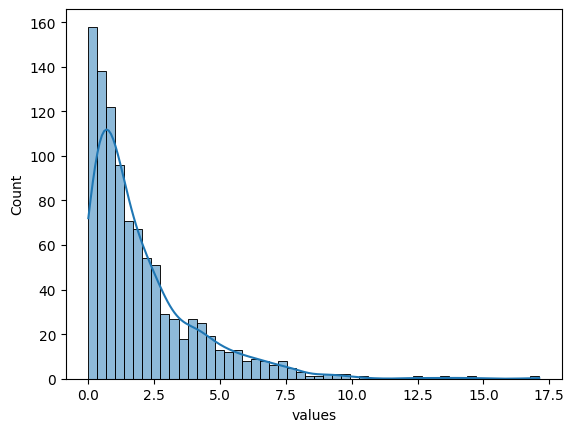

In [4]:
sns.histplot(df, x='values', bins=50, kde=True)

### Now scaling and normalizing start


In [11]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
#for box cox scaliing algo and it must be poestive values for box
pt_box= PowerTransformer(method='box-cox')

#for yeo-johnson scaling algo
pt_yeo= PowerTransformer(method='yeo-johnson')

#QuantileTransformer
pt_Q= QuantileTransformer(output_distribution='normal')


df['Box_cox']=pt_box.fit_transform(df[['values']]+1)
df['yeo-johnson']=pt_yeo.fit_transform(df[['values']]+1)
df['Quantile']=pt_Q.fit_transform(df[['values']])

In [12]:
df.head()

,values,Box_cox,yeo-johnson,Quantile
0,1.591749,0.179335,0.163651,0.162552
1,2.511862,0.677331,0.685783,0.587964
2,1.846446,0.339698,0.331474,0.286135
3,1.574402,0.167607,0.151411,0.157469
4,1.102097,-0.202107,-0.230634,-0.154930


### Ploting all

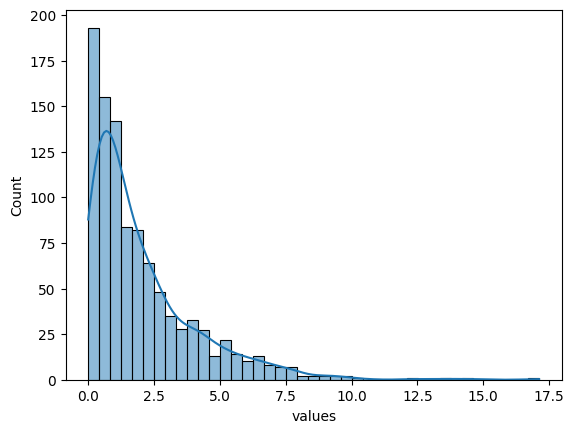

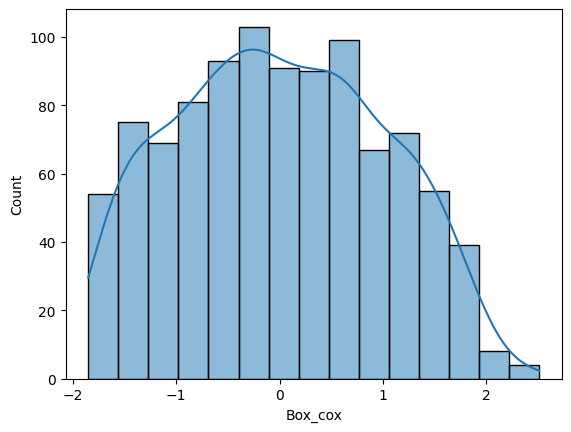

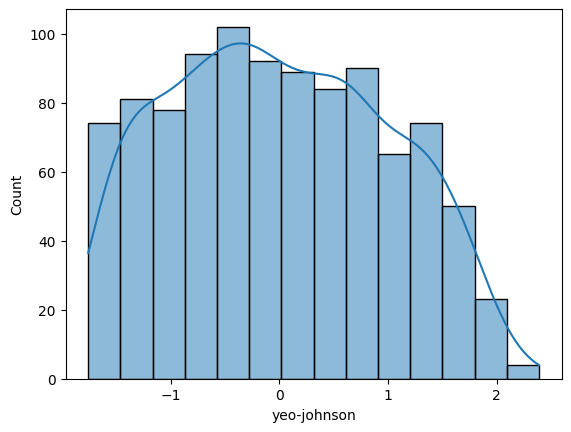

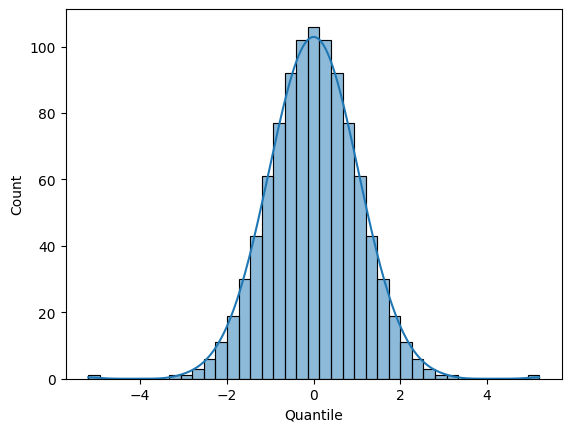

In [13]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()